In [70]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [71]:
# load dataset, more than one sheet in a file
df = pd.read_csv("full_data_dvdrental_raw.csv")

df.head()

,customer_id,full_name,city,country,film_title,category,film_length,rental_id,rental_date,return_date,revenue,store_id,inventory_id
0,416,Pinson Jeffery,Dadu,Pakistan,Giant Troopers,Children,102,1158,2005-06-14 22:53:33,2005-06-18 21:37:33,2.99,2,1632
1,516,Noe Elmer,Battambang,Cambodia,Wash Heavenly,Foreign,161,1159,2005-06-14 22:55:13,2005-06-17 02:11:13,4.99,2,4395
2,239,Romero Minnie,Ciomas,Indonesia,Name Detective,Games,178,1160,2005-06-14 23:00:34,2005-06-18 01:58:34,4.99,1,2795
3,592,Roush Terrance,Szkesfehrvr,Hungary,Truman Crazy,Action,92,1163,2005-06-14 23:12:46,2005-06-23 21:53:46,6.99,2,4209
4,49,Edwards Joyce,Jedda,Saudi Arabia,Sleuth Orient,Games,87,1164,2005-06-14 23:16:26,2005-06-16 21:00:26,0.99,1,3691


In [72]:
# inspecting data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14596 entries, 0 to 14595
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   14596 non-null  int64  
 1   full_name     14596 non-null  object 
 2   city          14596 non-null  object 
 3   country       14596 non-null  object 
 4   film_title    14596 non-null  object 
 5   category      14596 non-null  object 
 6   film_length   14596 non-null  int64  
 7   rental_id     14596 non-null  int64  
 8   rental_date   14596 non-null  object 
 9   return_date   14413 non-null  object 
 10  revenue       14596 non-null  float64
 11  store_id      14596 non-null  int64  
 12  inventory_id  14596 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.4+ MB


In [73]:
# droping null rows
df.isnull().sum()
df = df.dropna()

In [74]:
# creating staff_id colomn
df["staff_id"] = df["store_id"]
df.head()

,customer_id,full_name,city,country,film_title,category,film_length,rental_id,rental_date,return_date,revenue,store_id,inventory_id,staff_id
0,416,Pinson Jeffery,Dadu,Pakistan,Giant Troopers,Children,102,1158,2005-06-14 22:53:33,2005-06-18 21:37:33,2.99,2,1632,2
1,516,Noe Elmer,Battambang,Cambodia,Wash Heavenly,Foreign,161,1159,2005-06-14 22:55:13,2005-06-17 02:11:13,4.99,2,4395,2
2,239,Romero Minnie,Ciomas,Indonesia,Name Detective,Games,178,1160,2005-06-14 23:00:34,2005-06-18 01:58:34,4.99,1,2795,1
3,592,Roush Terrance,Szkesfehrvr,Hungary,Truman Crazy,Action,92,1163,2005-06-14 23:12:46,2005-06-23 21:53:46,6.99,2,4209,2
4,49,Edwards Joyce,Jedda,Saudi Arabia,Sleuth Orient,Games,87,1164,2005-06-14 23:16:26,2005-06-16 21:00:26,0.99,1,3691,1


In [75]:
# converting to datetimme format
df["rental_date"] = pd.to_datetime(df["rental_date"])
df["return_date"] = pd.to_datetime(df["return_date"])

In [76]:
df["rental_duration"] = (df["return_date"] - df["rental_date"]).dt.days
df["date"] = df["rental_date"].dt.date
df["time"] = df["rental_date"].dt.time
df["year_month"] = df["rental_date"].dt.strftime('%Y-%m')

In [77]:
df.drop(["return_date"], axis=1);

In [78]:
df.head()

,customer_id,full_name,city,country,film_title,category,film_length,rental_id,rental_date,return_date,revenue,store_id,inventory_id,staff_id,rental_duration,date,time,year_month
0,416,Pinson Jeffery,Dadu,Pakistan,Giant Troopers,Children,102,1158,2005-06-14 22:53:33,2005-06-18 21:37:33,2.99,2,1632,2,3,2005-06-14,22:53:33,2005-06
1,516,Noe Elmer,Battambang,Cambodia,Wash Heavenly,Foreign,161,1159,2005-06-14 22:55:13,2005-06-17 02:11:13,4.99,2,4395,2,2,2005-06-14,22:55:13,2005-06
2,239,Romero Minnie,Ciomas,Indonesia,Name Detective,Games,178,1160,2005-06-14 23:00:34,2005-06-18 01:58:34,4.99,1,2795,1,3,2005-06-14,23:00:34,2005-06
3,592,Roush Terrance,Szkesfehrvr,Hungary,Truman Crazy,Action,92,1163,2005-06-14 23:12:46,2005-06-23 21:53:46,6.99,2,4209,2,8,2005-06-14,23:12:46,2005-06
4,49,Edwards Joyce,Jedda,Saudi Arabia,Sleuth Orient,Games,87,1164,2005-06-14 23:16:26,2005-06-16 21:00:26,0.99,1,3691,1,1,2005-06-14,23:16:26,2005-06


In [79]:
# check for outlier
num_cols = df[["revenue"]]
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ((num_cols < lower_bound) | (num_cols > upper_bound))
outliers.sum()

revenue    107
dtype: int64

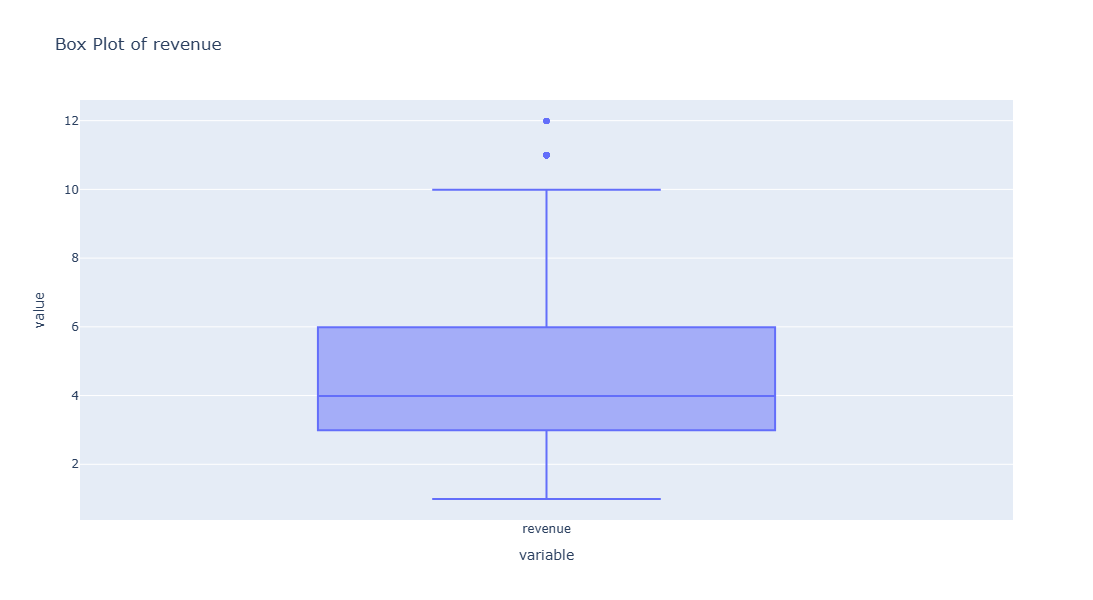

In [80]:
# using boxplot to visualize oulier for the "revenue" feature
fig = px.box(
    df,
    y=["revenue"],
    title="Box Plot of revenue ",
    width=600,
    height=600
)
fig.show()

In [81]:
# droping rows with revenue greater than 10
df = df[df["revenue"] <= 8]

# check for outlier
num_cols = df[["revenue"]]
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ((num_cols < lower_bound) | (num_cols > upper_bound))
outliers.sum()

revenue    0
dtype: int64

In [82]:
# check for outlier
num_cols = df[["rental_duration"]]
q1 = num_cols.quantile(0.25)
q3 = num_cols.quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = ((num_cols < lower_bound) | (num_cols > upper_bound))
outliers.sum()

rental_duration    0
dtype: int64

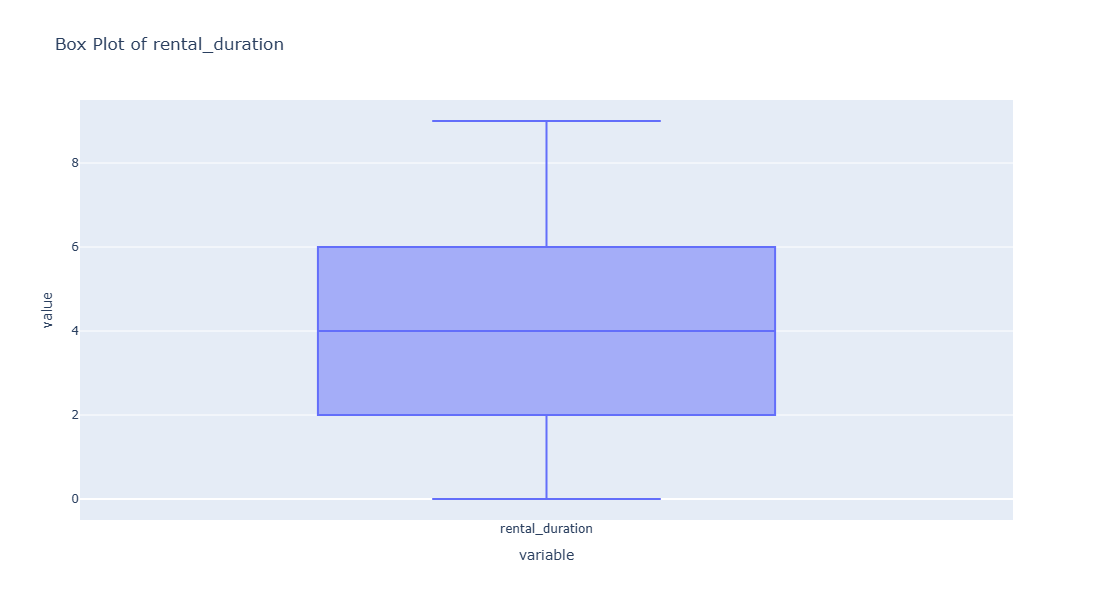

In [83]:
# using boxplot to visualize oulier for the "revenue" feature
fig = px.box(
    df,
    y=["rental_duration"],
    title="Box Plot of rental_duration ",
    width=600,
    height=600
)
fig.show()

In [84]:
df.to_csv("full_data_dvdrental_cleaned.csv", index=False)

# Distribution
Histogram to visulize the distribution of revenue, rental per customer, rental duration
and payment per transaction

rental_id
1158     2.99
1159     4.99
1160     4.99
1163     6.99
1164     0.99
         ... 
16044    0.99
16045    0.99
16046    0.99
16047    0.99
16049    3.99
Name: revenue, Length: 13631, dtype: float64


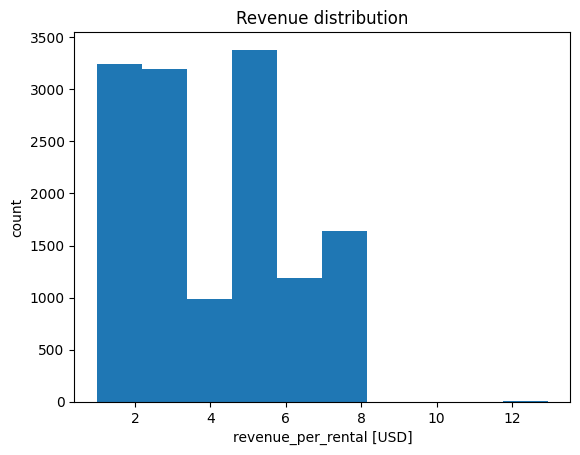

In [85]:
# rental revenue
revenue_per_rental = df.groupby("rental_id")["revenue"].sum()
print(revenue_per_rental)
plt.hist(revenue_per_rental)
plt.xlabel("revenue_per_rental [USD]")
plt.ylabel("count")
plt.title("Revenue distribution");

full_name
Abney Rafael       17
Adam Nathaniel     22
Adams Kathleen     24
Alexander Diana    27
Allard Gordon      27
                   ..
Wright Brenda      25
Wyman Brian         6
Yanez Luis         19
Yee Marvin         19
Young Cynthia      28
Name: rental_id, Length: 599, dtype: int64


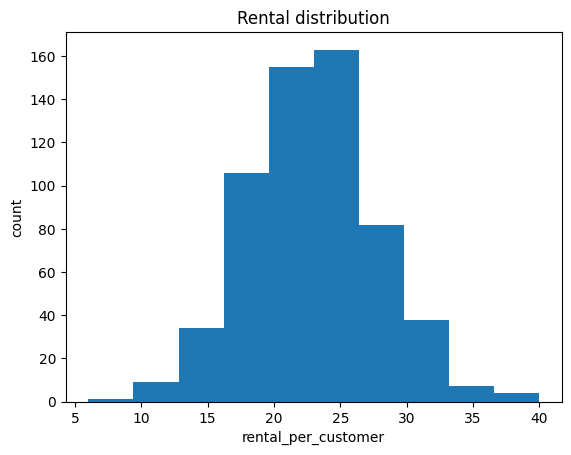

In [112]:
# rental per customer
rental_per_customer = df.groupby("full_name")["rental_id"].count()
print(rental_per_customer)
plt.hist(rental_per_customer)
plt.xlabel("rental_per_customer")
plt.ylabel("count")
plt.title("Rental distribution");

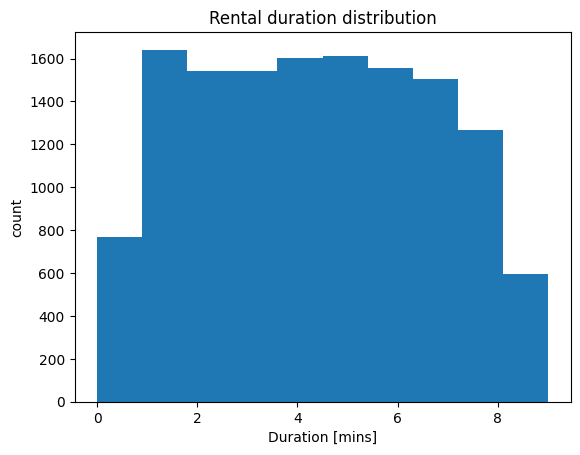

In [87]:
# rental duration
plt.hist(df["rental_duration"])
plt.xlabel("Duration [mins]")
plt.ylabel("count")
plt.title("Rental duration distribution");

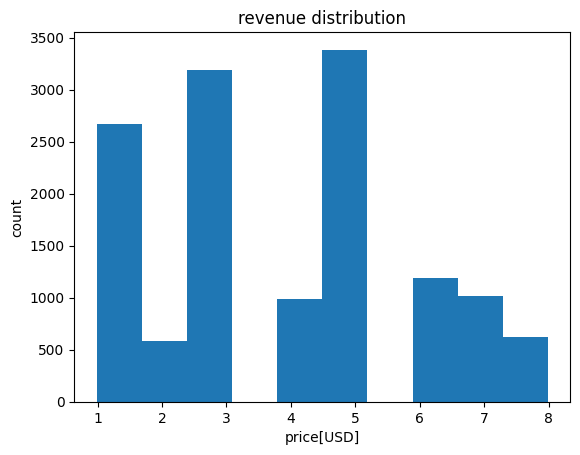

In [88]:
# payment per transaction distribution
plt.hist(df["revenue"])
plt.xlabel("price[USD]")
plt.ylabel("count")
plt.title("revenue distribution");

# Trend and Pattern Analysis
line graph to show rental, revenue, category trends and pattern

            Rentals  Revenue
date                        
2005-06-14       11    41.89
2005-06-15      294  1092.06
2005-06-16      274  1050.26
2005-06-17      268  1034.32
2005-06-18      285  1137.15
2005-06-19      289  1106.11
2005-06-20      269  1013.31
2005-06-21      220   878.80
2005-07-05       26   119.74
2005-07-06      476  1859.24
2005-07-07      432  1668.68
2005-07-08      480  1880.20
2005-07-09      495  1902.05
2005-07-10      456  1708.44
2005-07-11      444  1778.56
2005-07-12      467  1839.33
2005-07-26       28   113.72
2005-07-27      616  2412.84
2005-07-28      583  2224.17
2005-07-29      605  2375.95
2005-07-30      585  2371.15
2005-07-31      652  2600.48
2005-08-01      642  2539.58
2005-08-02      610  2401.90
2005-08-16       21    91.79
2005-08-17      569  2229.31
2005-08-18      578  2303.22
2005-08-19      587  2227.13
2005-08-20      575  2260.25
2005-08-21      632  2547.68
2005-08-22      603  2350.97
2005-08-23      563  2184.37


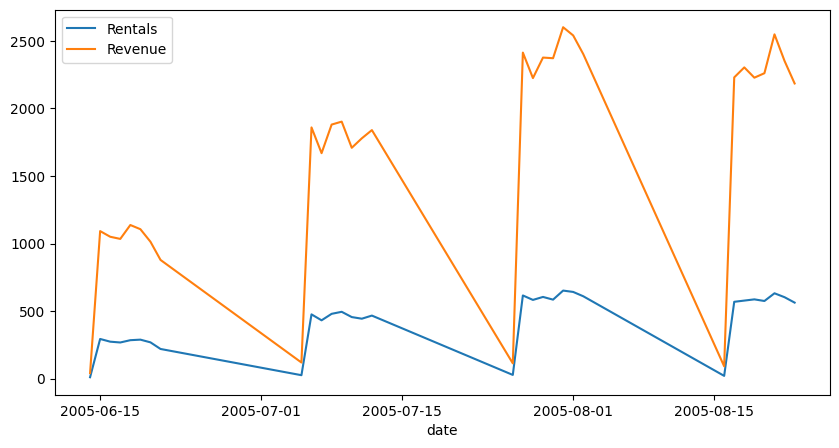

In [89]:
# rental and revenue trend
rental_by_date = df.groupby("date")["rental_id"].count()
revenue_by_date = df.groupby("date")["revenue"].sum()

trend_df = pd.DataFrame({
    "Rentals": rental_by_date,
    "Revenue": revenue_by_date
})

print(trend_df)
trend_df.plot(kind="line", figsize=(10,5));

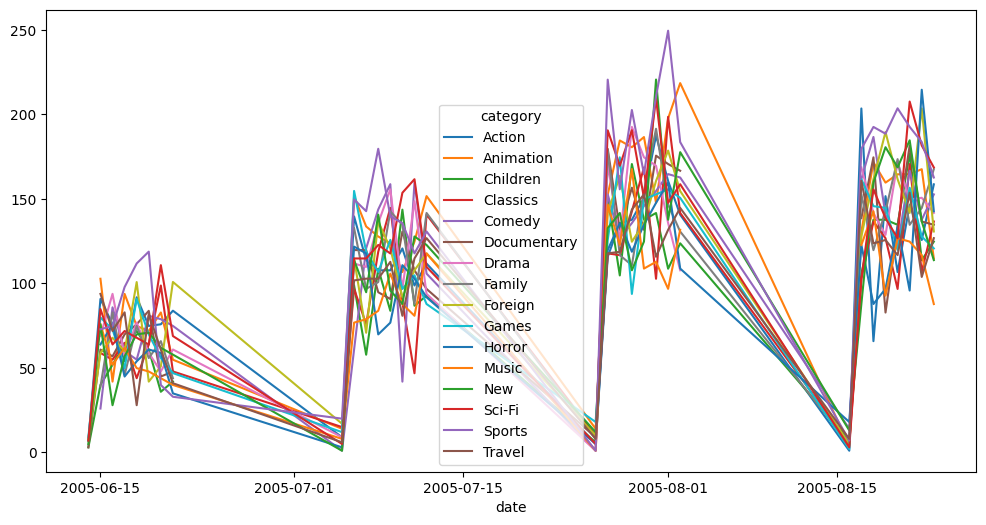

In [90]:
category_by_date = df.groupby(["date", "category"])["revenue"].sum().reset_index()

category_sales = category_by_date.pivot(
    index="date",
    columns="category",
    values="revenue"
)
category_sales.plot(
    kind="line",
    figsize=(12,6)
);

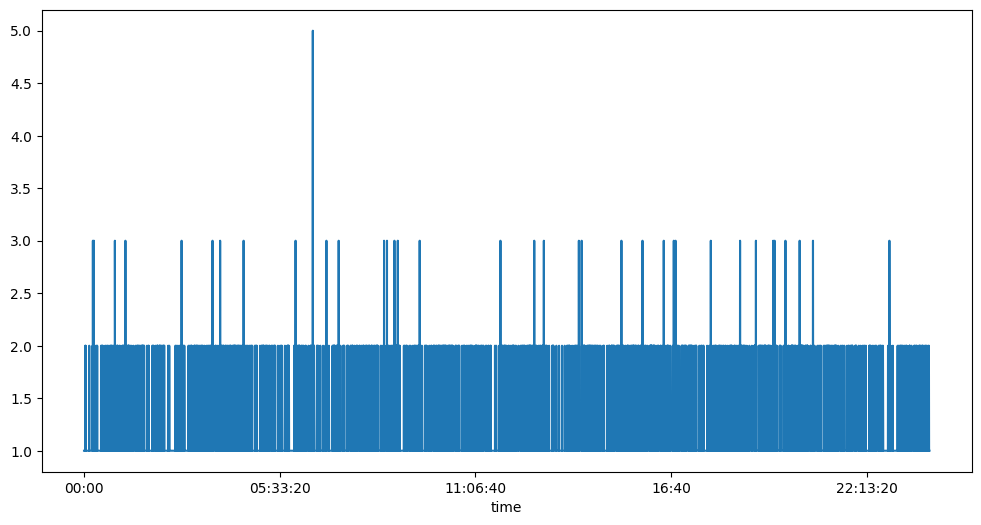

In [91]:
rental_by_time = df.groupby("time")["rental_id"].count()

rental_by_time.plot(
    kind="line",
    figsize=(12,6)
);

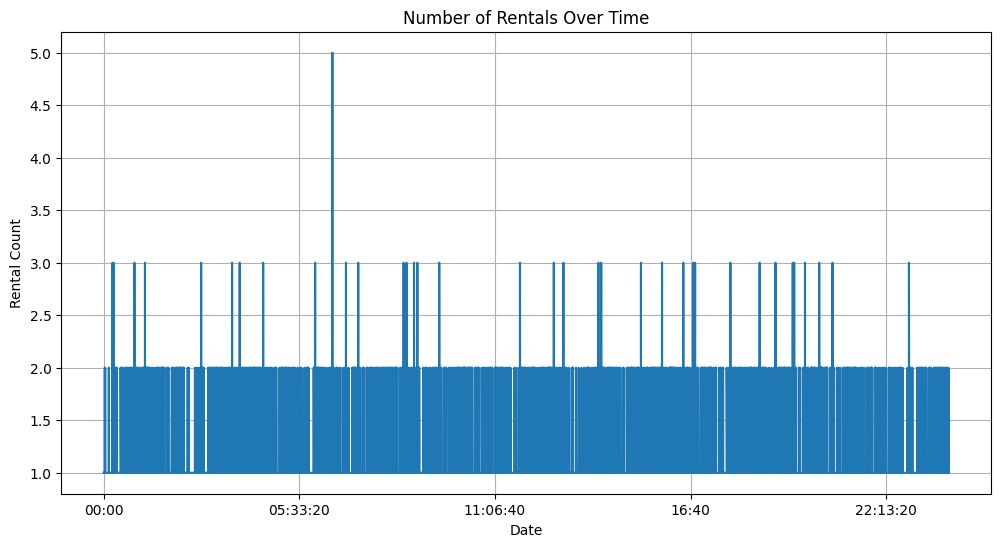

In [92]:
# df["date"] = pd.to_datetime(df["date"])

rental_by_date = (
    df.groupby("time")["rental_id"]
      .count()
      .sort_index()
)

rental_by_date.plot(figsize=(12,6))
plt.title("Number of Rentals Over Time")
plt.xlabel("Date")
plt.ylabel("Rental Count")
plt.grid(True)
plt.show()


# Customer Insight
Using various charts and aggregations to show customer behaviour

In [93]:
# percentage of customers who are repeat rentals
rentals_per_customer = df.groupby("full_name")["rental_id"].count()
repeat_customers = rentals_per_customer[rentals_per_customer > 1]
percentage_repeat = (len(repeat_customers) / len(rentals_per_customer)) * 100
print(f"Percentage of repeat renters: {percentage_repeat:.2f}%")


Percentage of repeat renters: 100.00%


In [94]:
# average spending per customer
average_spending_per_customer = df.groupby("full_name")["revenue"].mean().sort_values(ascending=False)
average_spending_per_customer

full_name
Schuler Kevin       5.302500
Jensen Lena         4.955517
Gregory Sonia       4.937368
Isbell Frederick    4.927500
Robins Greg         4.906667
                      ...   
Bowman Caroline     2.913077
Hoffman Mattie      2.832105
Duncan Samantha     2.808182
Gaffney Felix       2.799524
Craig Bobbie        2.378889
Name: revenue, Length: 599, dtype: float64

In [95]:
total_revenue = df["revenue"].sum()
total_customer = df["customer_id"].nunique()
average_customer_spending = round((total_revenue / total_customer), 2)
average_customer_spending

np.float64(89.06)

In [96]:
# average time gap between rentals
df = df.sort_values("rental_date")
df["time_gap"] = df["rental_date"].diff()
average_gap = df["time_gap"].mean()
print("Average time gap between rentals:", average_gap)

Average time gap between rentals: 0 days 00:07:23.582147572


# Film & Category Insight
using aggregation and chart to show film & category rentals and revenue

In [97]:
# film with most revenue per rental
film_insight = (
      df.groupby("film_title")
      .agg(
          total_revenue=("revenue", "sum"),
          rental_count=("rental_id", "count")
      )
)
film_insight["revenue_per_rental"] = (film_insight["total_revenue"] / film_insight["rental_count"])
top_5_film = film_insight.sort_values("revenue_per_rental",ascending=False).head(5)

top_5_film

,total_revenue,rental_count,revenue_per_rental
film_title,,,
Pittsburgh Hunchback,63.91,9,7.101111
Clerks Angels,27.96,4,6.990000
Park Citizen,20.97,3,6.990000
Paths Control,41.94,6,6.990000
Hustler Party,61.91,9,6.878889


In [98]:
# category with highest average rental price
film_category_insight = (
      df.groupby("category")
      .agg(
          total_revenue=("revenue", "sum"),
          rental_count=("rental_id", "count")
      )
)
film_category_insight["revenue_per_rental"] = (film_category_insight["total_revenue"] / film_category_insight["rental_count"])
top_5_category = film_category_insight.sort_values("revenue_per_rental",ascending=False).head(5)

top_5_category

,total_revenue,rental_count,revenue_per_rental
category,,,
Comedy,3378.20,780,4.331026
Sports,4261.96,1004,4.244980
New,3309.14,786,4.210102
Travel,3059.59,741,4.129001
Horror,2928.85,715,4.096294


Correlation between film length and rental frequency: -0.035


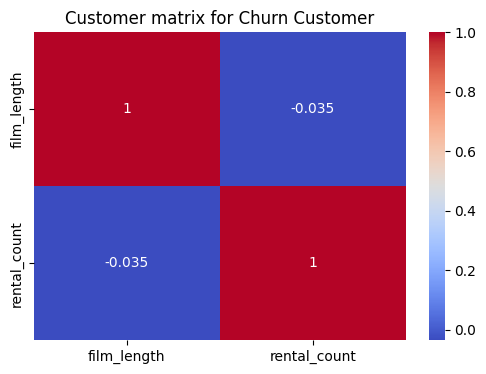

In [99]:
rentals_per_film = df.groupby(["film_title", "film_length"])["rental_id"].count().reset_index(name="rental_count")
correlation = rentals_per_film["film_length"].corr(rentals_per_film["rental_count"])
print(f"Correlation between film length and rental frequency: {correlation:.3f}")

corr_df = rentals_per_film[["film_length", "rental_count"]]
corr=corr_df[["film_length","rental_count"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(data=corr, annot=True, cmap="coolwarm")
plt.title("Customer matrix for Churn Customer")
plt.show()



In [100]:
film_demands = (
      df.groupby("film_title")
      .agg(
          total_demand=("rental_id", "count"),
          total_inventory=("inventory_id", "nunique")
      )
)

high_demand_low_inventory = film_demands[(film_demands["total_demand"] < 10) & (film_demands["total_inventory"] > 5)]
high_demand_low_inventory.sort_values("total_demand", ascending=True)

,total_demand,total_inventory
film_title,,
American Circus,8,6
Hustler Party,9,6
Telegraph Voyage,9,6


# Store & Staff Insight
using charts and aggregations to show how staff and store behaviour affects sales

In [101]:
# most profitable store
store_revenue = df.groupby("store_id")["revenue"].sum().sort_values(ascending=False)
store_revenue

store_id
2    26936.84
1    26407.81
Name: revenue, dtype: float64

In [102]:
staff_returns = df.groupby("staff_id")["rental_id"].count().sort_values(ascending=False)
staff_returns

staff_id
1    6819
2    6816
Name: rental_id, dtype: int64

# Geographic Insight
using charts and aggregations to show sales in diferent cities

In [124]:
# most profitable city/country
most_profitable_cities = df.groupby("country")["revenue"].sum().sort_values(ascending=False)
most_profitable_cities.head()

country
India            1319
China            1216
United States     815
Japan             707
Mexico            672
Name: rental_id, dtype: int64

In [104]:
# customer preference by country
country_category_counts = (
    df.groupby(["country", "category"])
      .agg(total_rentals=("rental_id", "count"))
      .reset_index()
)
top_category_per_country = country_category_counts.loc[country_category_counts.groupby("country")["total_rentals"].idxmax()].reset_index(drop=True)
total_rentals_country = df.groupby("country")["rental_id"].count().reset_index(name="country_total_rentals")
top_category_per_country = top_category_per_country.merge(total_rentals_country, on="country")
top_category_per_country = top_category_per_country.sort_values("country_total_rentals", ascending=False)

top_category_per_country



,country,category,total_rentals,country_total_rentals
42,India,Action,98,1319
21,China,Animation,99,1216
101,United States,Sports,63,815
48,Japan,Animation,58,707
58,Mexico,Sports,58,672
...,...,...,...,...
79,Saint Vincent and the Grenadines,Children,3,18
0,Afghanistan,Comedy,3,17
64,Nepal,Foreign,2,16
93,Tonga,Sports,3,16


In [105]:
top_category = df.groupby("category")["revenue"].sum().sort_values(ascending=True)
top_category

category
Music          2711.96
Children       2921.84
Horror         2928.85
Classics       3039.80
Travel         3059.59
Games          3280.92
Documentary    3306.15
New            3309.14
Family         3321.74
Action         3354.60
Comedy         3378.20
Drama          3454.20
Foreign        3456.06
Sci-Fi         3744.70
Animation      3814.94
Sports         4261.96
Name: revenue, dtype: float64

In [123]:
top_10 = (
    df.groupby("film_title", as_index=False)
      .agg(value=("revenue", "sum"))
      .sort_values("value", ascending=False)
      .head(10)
)

top_10

,film_title,value
733,Scalawag Duck,157.71
29,Apache Divine,151.73
96,Bucket Brotherhood,150.72
537,Massacre Usual,149.75
936,Witches Panic,146.75
148,Closer Bang,143.77
222,Dogma Family,141.75
290,Fellowship Autumn,137.76
162,Confidential Interview,136.76
311,Forrester Comancheros,136.75
